In [3]:
import requests

def get_api_json(url):
    try:
        r = requests.get(url, timeout=3)
        r_json = r.json()
        return r_json
    except:
        return get_api_json(url)

if __name__ == '__main__':
    pass

In [6]:

import pandas as pd
import pickle
import datetime


with open('hero_name.pickle', 'rb') as handle:  
    hero_name = pickle.load(handle)

sql = """SELECT 
league_match_info.*,
teams.name as team_name,
teams.tag as team_tag
from 
(SELECT
leagues.name as league_name,
leagues.leagueid,
matches.match_id,
matches.start_time,
EXTRACT(epoch FROM age(current_timestamp, to_timestamp(matches.start_time)))/3600 as hours_to_now,
matches.radiant_win,
matches.duration,
matches.cluster,
matches.lobby_type,
matches.game_mode,
matches.engine,
notable_players.name as player_name,
player_matches.hero_id,
player_matches.kills,
player_matches.deaths,
player_matches.assists,
player_matches.last_hits,
player_matches.gold_per_min,
player_matches.xp_per_min,
CASE WHEN player_matches.player_slot < 5 THEN matches.radiant_team_id ELSE matches.dire_team_id END as team_id,
CASE WHEN player_matches.player_slot < 5 THEN 'radiant' ELSE 'dire' END as camp,
CASE WHEN (player_matches.player_slot < 5 and matches.radiant_win = true) or (player_matches.player_slot >= 5 and matches.radiant_win = false) THEN true ELSE false END as is_win
FROM matches
JOIN leagues using(leagueid)
JOIN player_matches using(match_id)
JOIN notable_players using(account_id)
WHERE leagueid = 9943  and start_time > 1527904857
) league_match_info
JOIN teams using(team_id)
order by start_time

"""

# WHERE leagueid = 9943  and start_time > 1527904857
# leagueid用来筛选联赛，start_time用来筛选正赛（排除预选赛）



matches = pd.DataFrame(get_api_json('https://api.opendota.com/api/explorer?sql={}'.format(sql))['rows'])
cn_matches = matches.copy()
cn_matches['hero_id'] = cn_matches['hero_id'].apply(lambda x:hero_name[x][1])
# cn_matches

matches.to_csv("matches.csv",index=False,sep=',')
matches

,assists,camp,cluster,deaths,duration,engine,game_mode,gold_per_min,hero_id,hours_to_now,...,leagueid,lobby_type,match_id,player_name,radiant_win,start_time,team_id,team_name,team_tag,xp_per_min
0,6,radiant,223,10,2187,1,2,391,48,4148.628800,...,9943,1,3927969700,rtz,False,1527904873,39,Evil Geniuses,EG,403
1,5,radiant,223,10,2187,1,2,266,30,4148.628800,...,9943,1,3927969700,Fly,False,1527904873,39,Evil Geniuses,EG,302
2,6,radiant,223,10,2187,1,2,267,104,4148.628800,...,9943,1,3927969700,s4,False,1527904873,39,Evil Geniuses,EG,305
3,3,radiant,223,7,2187,1,2,240,16,4148.628800,...,9943,1,3927969700,Cr1t-,False,1527904873,39,Evil Geniuses,EG,321
4,13,dire,223,3,2187,1,2,768,72,4148.628800,...,9943,1,3927969700,Paparazi灬,False,1527904873,726228,Vici Gaming,VG,742
5,20,dire,223,2,2187,1,2,391,26,4148.628800,...,9943,1,3927969700,LaNm,False,1527904873,726228,Vici Gaming,VG,578
6,30,dire,223,2,2187,1,2,382,62,4148.628800,...,9943,1,3927969700,Fenrir,False,1527904873,726228,Vici Gaming,VG,514
7,25,dire,223,2,2187,1,2,623,106,4148.628800,...,9943,1,3927969700,Ori,False,1527904873,726228,Vici Gaming,VG,782
8,24,dire,223,2,2187,1,2,430,65,4148.628800,...,9943,1,3927969700,old eLeVeN,False,1527904873,726228,Vici Gaming,VG,628
9,5,radiant,223,11,2187,1,2,402,52,4148.628800,...,9943,1,3927969700,SumaiL,False,1527904873,39,Evil Geniuses,EG,428


In [7]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015 entries, 0 to 1014
Data columns (total 24 columns):
assists         1015 non-null int64
camp            1015 non-null object
cluster         1015 non-null int64
deaths          1015 non-null int64
duration        1015 non-null int64
engine          1015 non-null int64
game_mode       1015 non-null int64
gold_per_min    1015 non-null int64
hero_id         1015 non-null int64
hours_to_now    1015 non-null float64
is_win          1015 non-null bool
kills           1015 non-null int64
last_hits       1015 non-null int64
league_name     1015 non-null object
leagueid        1015 non-null int64
lobby_type      1015 non-null int64
match_id        1015 non-null int64
player_name     1015 non-null object
radiant_win     1015 non-null bool
start_time      1015 non-null int64
team_id         1015 non-null int64
team_name       1015 non-null object
team_tag        1015 non-null object
xp_per_min      1015 non-null int64
dtypes: bool(2), float64

Index(['assists', 'camp', 'deaths', 'duration', 'engine', 'game_mode',
       'gold_per_min', 'hero_id', 'kills', 'last_hits', 'league_name',
       'leagueid', 'lobby_type', 'player_name', 'team_id', 'team_name',
       'team_tag', 'xp_per_min'],
      dtype='object')


/Users/hushengzhe/Desktop/学习/DATA296/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


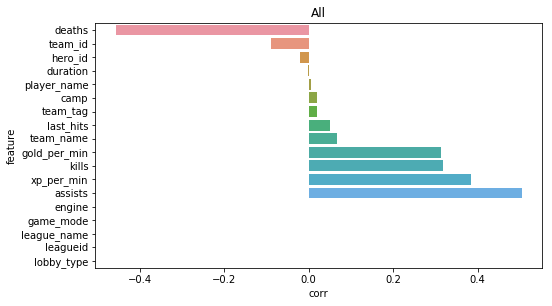

In [12]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from glob import glob 


features = matches.columns.drop(['is_win','hours_to_now','match_id','radiant_win','start_time','cluster'])
#all_data = pd.concat([i for i in players_list])

print (features)

def cndota_bestdota(frame, features,players_name): 
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['corr'] = [frame[f].corr(frame['is_win'],'spearman') for f in features]
    spr = spr.sort_values('corr')
    plt.figure(figsize=(8,0.25*len(features)))
    sns.barplot(data=spr,y='feature', x='corr', orient = 'h')
    plt.title(players_name)

cndota_bestdota(matches, features,'All')